# HW4 - AMATH 581
### Anna Dodson
### Nov 13, 2024


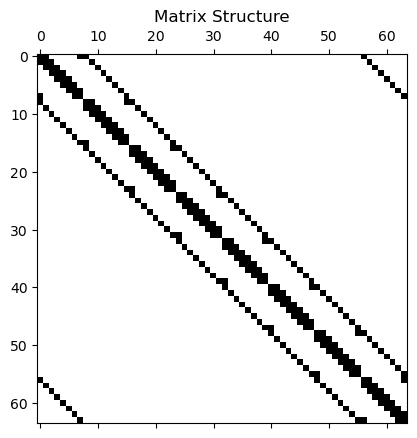

[[-0.64  0.16  0.   ...  0.    0.    0.  ]
 [ 0.16 -0.64  0.16 ...  0.    0.    0.  ]
 [ 0.    0.16 -0.64 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.64  0.16  0.  ]
 [ 0.    0.    0.   ...  0.16 -0.64  0.16]
 [ 0.    0.    0.   ...  0.    0.16 -0.64]]
0.16
0.16


In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

# Create the matrices A, B and C

# For A: 9 main diagonals
m = 8 # N value in x and y directions
L = (-10, 10)

n = m * m  # total size of matrix
dx = ( L[1] - L[0] )/m

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()

# Plot matrix structure
plt.figure(5)
plt.spy(matA)
plt.title('Matrix Structure')
plt.show()

A1 = (1/dx**2)*matA

print(A1)

In [102]:

# Constructing matrix C for ∂y using finite differences with periodic boundaries
e1 = np.ones((n, 1))
# the wrap around ones
e2 = np.ones((m, 1))

# Constructing matrix C for ∂y using finite differences with periodic boundaries
diagonals_dy = [-e1.flatten(), e1.flatten(), e1.flatten(), -e1.flatten()]
offsets_dy = [-m, m, -(n-m), n-m]  # Shifts in y direction

# Matrix B for ∂y operator
matB = spdiags(diagonals_dy, offsets_dy, n, n).toarray()

# Set wrap-around connections to zero initially
e_wrap1 = np.ones(n)  # for wrap-around connections
e_wrap2 = np.ones(n)  # for wrap-around connections
for i in range(1, m):
    e_wrap1[m * i] = 0  # Avoid unwanted connections across row ends
    e_wrap2[m * i - 1] = 0  # Avoid unwanted connections across row ends

# Diagonals for ∂x matrix B
diagonals_dx = [-e_wrap2.flatten(), e_wrap1.flatten(), ]
offsets_dx = [-1, 1]  # Shifts in x direction

# Matrix C for ∂x operator
matC = spdiags(diagonals_dx, offsets_dx, n, n).toarray()

for i in range(m):
    # Set periodic connections at row ends for each block row
    matC[i * m, (i + 1) * m - 1] = -1  # Left boundary wraps to right
    matC[(i + 1) * m - 1, i * m] = 1    # Right boundary wraps to left

# Assign matrices to B and C
A2 = (1/(2*dx))*matB
A3 = (1/(2*dx))*matC

# print(A2[0][7])
# print(A2[63][56])

64
8


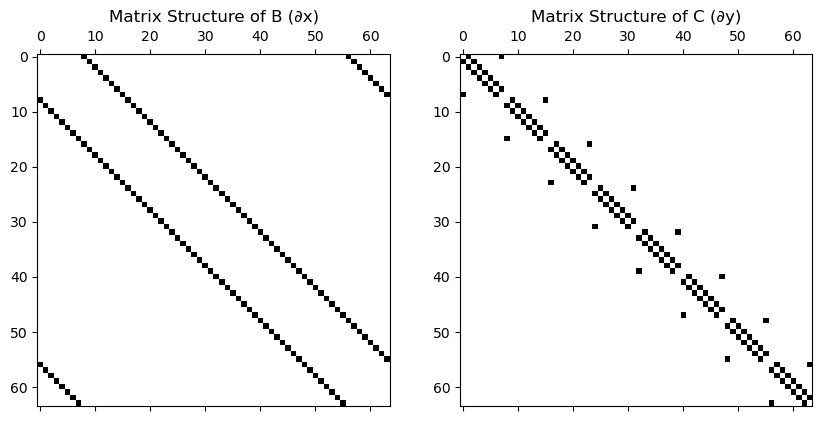

2.5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.   0.2  0.  ...  0.   0.   0. ]
 [-0.2  0.   0.2 ...  0.   0.   0. ]
 [ 0.  -0.2  0.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.2  0. ]
 [ 0.   0.   0.  ... -0.2  0.   0.2]
 [ 0.   0.   0.  ...  0.  -0.2  0. ]]


In [103]:
# Plot matrix structures
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.spy(matB)
plt.title('Matrix Structure of B (∂x)')

plt.subplot(1, 2, 2)
plt.spy(matC)
plt.title('Matrix Structure of C (∂y)')

plt.show()

print(dx)
print(A2)
print(A3)

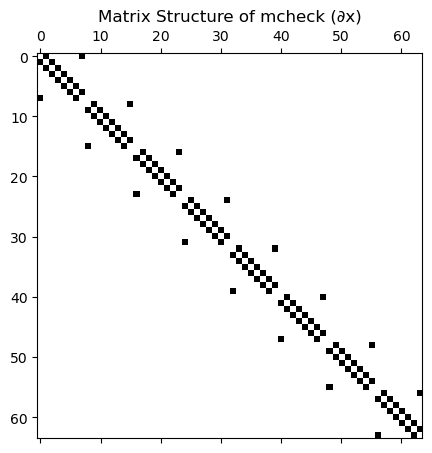

In [100]:
# Extra check
mcheck = np.zeros((n, n))
mcheck[0][1] = 1
mcheck[0][7] = -1
mcheck[1][0] = -1
mcheck[1][2] = 1
mcheck[2][1] = -1
mcheck[2][3] = 1
mcheck[3][2] = -1
mcheck[3][4] = 1
mcheck[4][3] = -1
mcheck[4][5] = 1
mcheck[5][4] = -1
mcheck[5][6] = 1
mcheck[6][5] = -1
mcheck[6][7] = 1
mcheck[7][0] = 1
mcheck[7][6] = -1
mcheck[8][9] = 1
mcheck[8][15] = -1

import numpy as np
from scipy.sparse import block_diag

# Function to create a single 8x8 `mcheck` block
def create_mcheck_block(m=8):
    block = np.zeros((m, m), dtype=int)
    for i in range(m):
        block[i, (i + 1) % m] = 1
        block[i, (i - 1) % m] = -1
    return block

# Create the single 8x8 block
single_block = create_mcheck_block(m=8)

# Repeat the block `m` times along the diagonal
m = 8
diagonal_blocks = [single_block] * m  # List with `m` identical blocks
large_matrix = block_diag(diagonal_blocks).toarray()  # Convert to a dense array for visualization

# Plot matrix structures
plt.figure(figsize=(10, 5))

plt.spy(large_matrix)
plt.title('Matrix Structure of mcheck (∂x)')

plt.show()
